In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import collections
import csv

from pprint import pprint as pp
import circlify as circ

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

DIR = os.getcwd()

# 2020 contributions

In [2]:
df20 = pd.read_csv("../2019to2020contributions.csv",
                    parse_dates = ["contribution_receipt_date"], low_memory=False) 

df20 = df20[[ "contributor_employer", 
                   "contributor_occupation", "contributor_first_name", 
                   "contributor_middle_name", "contributor_last_name","contribution_receipt_amount"]]

df20 = df20.drop_duplicates(subset=["contributor_first_name", 
                   "contributor_middle_name", "contributor_last_name",])
df20 = df20[df20["contribution_receipt_amount"] >= 0]

len_orig = df20.shape[0]

faux = ["MISSOURI", "BRITISH", "DISTRICT", "CHICAGO", "INTERNATIONAL", "MO", "UNIVERSITY HOSPITAL", "FLORIDA",
       "CAROLINA" , "BRIRISH", "SOUTHERN"]
df20_notCU = df20[df20.contributor_employer.str.contains('|'.join(faux))]
df20_CU = df20[~df20.contributor_employer.str.contains('|'.join(faux))]

len_notCU = df20_notCU.shape[0]
len_CU = df20_CU.shape[0]

print(len_notCU + len_CU == len_orig)
print(len_orig, len_notCU, len_CU)

True
5364 397 4967


In [3]:
df20_CU.to_csv("occs_CU.csv")
# df20_notCU.to_csv("occs_notCU.csv")
# df20.to_csv("occs_orig.csv")

In [4]:
occs20_CU = collections.Counter(df20_CU["contributor_occupation"])
# occs20_notCU = collections.Counter(df20_notCU["contributor_occupation"])
# occs20 = collections.Counter(df20["contributor_occupation"])

with open('2020occs_CU.csv','w') as csvfile:
    writer=csv.writer(csvfile)
    for key, value in occs20_CU.items():
        writer.writerow([key] + [value]) 

# with open('2020occs_notCU.csv','w') as csvfile:
#     writer=csv.writer(csvfile)
#     for key, value in occs20_notCU.items():
#         writer.writerow([key] + [value]) 
              
# with open('2020occs_all.csv','w') as csvfile:
#     writer=csv.writer(csvfile)
#     for key, value in occs20.items():
#         writer.writerow([key] + [value]) 

pre-update: I took the original output (without the faux and with the buggy drop_duplicates) and manually sorted the professions
the previous sorting can be found at 2020occs_categorized.csv

new: the next block updates the original sorted counts with the correct numbers (after adding the faux and fixing the drop_duplicates)

In [21]:
# taking the original sorting (2020occs_categorized.csv) and 
# updating the counts with proper drop_duplicates and faux
updated20_counts = pd.DataFrame.from_dict(occs20_CU, orient='index').reset_index()
updated20_counts = updated20_counts.rename(columns={'index':'occupation', 0:'count'})

categories20 = pd.read_csv("2020occs_categorized.csv")
categories20 = categories20.drop(columns=["count"])

updated20_counts_wlabel = updated20_counts.merge(categories20, how = "left", on="occupation")
updated20_counts_wlabel

,occupation,count,category
0,RESEARCHER,125,ACADEMIA
1,PHYSICIAN,294,MEDICAL
2,PROFESSOR,667,FACULTY
3,PH.D. CANDIDATE,2,GRAD
4,SCIENTIST,121,ACADEMIA
...,...,...,...
1147,EXEC DIRECTOR,1,ADMIN
1148,INFORMATION SECURITY MANAGER,1,ADMIN
1149,HUMAN RESOURCES MANAGEMENT PROFESSIONA,1,ADMIN
1150,SYSTEM TRAINER,1,NaN


In [24]:
updated20_counts_wlabel.to_excel("NEW2020SORTED.xlsx")

For all the NaNs, I relabeled them manually

Final labels and summary statistics can be found at NEW2020SORTED.xlsx

[Circle(x=-0.6798773431732197, y=-0.3251063469385019, r=0.14277056036290678, level=1, ex={'datum': 145}),
 Circle(x=-0.4222344521590375, y=-0.6417106352797192, r=0.2063839771016141, level=1, ex={'datum': 303}),
 Circle(x=-0.7811726063839696, y=0.01842431754932889, r=0.21538310469217203, level=1, ex={'datum': 330}),
 Circle(x=-0.5220809056414982, y=0.46496898815409426, r=0.30088296260176206, level=1, ex={'datum': 644}),
 Circle(x=0.08594518804024269, y=-0.6905362739080244, r=0.3041358459224597, level=1, ex={'datum': 658}),
 Circle(x=0.08564983190328637, y=0.4572659745082238, r=0.3068965909996702, level=1, ex={'datum': 670}),
 Circle(x=-0.23203512191421505, y=-0.11829485822636779, r=0.3505180438086557, level=1, ex={'datum': 874}),
 Circle(x=0.552985811795647, y=-0.11829485822636779, r=0.4345028899012064, level=1, ex={'datum': 1343})]


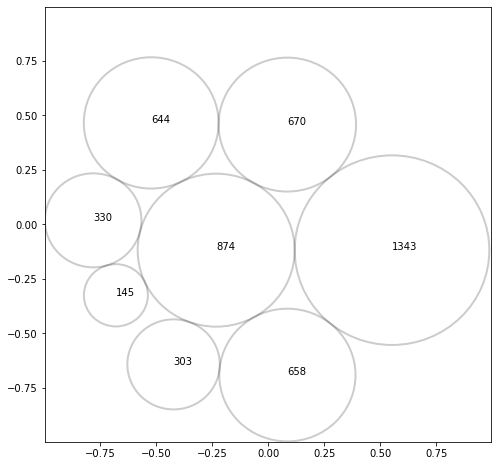

In [25]:
# faculty, teaching positions, admin, academia & research, medical & health, undergrads, grad students, other
# numbers from NEW2020SORTED.xlsx spreadsheet

circs20 = sorted([874,303,1343,670,644,330,658,145])

circles20 = circ.circlify(circs20, show_enclosure=False)
pp(circles20)
circ.bubbles(circles20)

# 2016 contributions

In [27]:
# # get data 
# df16 = pd.read_csv(DIR + "/2015to2016contributions.csv") 
# df16

# # extract unique professions
# df16_nodups = df16.drop_duplicates(subset=["contributor_last_name", "contributor_middle_name",
#                                               "contributor_middle_name"])
# occs16 = collections.Counter(df16_nodups["contributor_occupation"])

# # export to spreadsheet in prepartion for manual sorting
# with open('2016occs.csv','w') as csvfile:
#     writer=csv.writer(csvfile)
#     for key, value in occs16.items():
#         writer.writerow([key] + [value]) 
              
        
df16 = pd.read_csv("../2015to2016contributions.csv",
                    parse_dates = ["contribution_receipt_date"], low_memory=False) 

df16 = df16[[ "contributor_employer", 
                   "contributor_occupation", "contributor_first_name", 
                   "contributor_middle_name", "contributor_last_name","contribution_receipt_amount"]]

df16 = df16.drop_duplicates(subset=["contributor_first_name", 
                   "contributor_middle_name", "contributor_last_name",])
df16 = df16[df16["contribution_receipt_amount"] >= 0]

len_orig = df16.shape[0]

faux = ["MISSOURI", "BRITISH", "DISTRICT", "CHICAGO", "INTERNATIONAL", "MO", "UNIVERSITY HOSPITAL", "FLORIDA",
       "CAROLINA" , "BRIRISH", "SOUTHERN"]
df16_notCU = df16[df16.contributor_employer.str.contains('|'.join(faux))]
df16_CU = df16[~df16.contributor_employer.str.contains('|'.join(faux))]

len_notCU = df16_notCU.shape[0]
len_CU = df16_CU.shape[0]

print(len_notCU + len_CU == len_orig)
print(len_orig, len_notCU, len_CU)

True
2577 246 2331


In [28]:
df16_CU.to_csv("occs16_CU.csv")
# df16_notCU.to_csv("occs16_notCU.csv")
# df16.to_csv("occs16_orig.csv")

In [29]:
occs16_CU = collections.Counter(df16_CU["contributor_occupation"])
# occs16_notCU = collections.Counter(df16_notCU["contributor_occupation"])
# occs16 = collections.Counter(df16["contributor_occupation"])

with open('2016occs_CU.csv','w') as csvfile:
    writer=csv.writer(csvfile)
    for key, value in occs16_CU.items():
        writer.writerow([key] + [value]) 

# with open('2016occs_notCU.csv','w') as csvfile:
#     writer=csv.writer(csvfile)
#     for key, value in occs16_notCU.items():
#         writer.writerow([key] + [value]) 
              
# with open('2016occs_all.csv','w') as csvfile:
#     writer=csv.writer(csvfile)
#     for key, value in occs16.items():
#         writer.writerow([key] + [value]) 

pre-update: I took the original output (without the faux and with the buggy drop_duplicates) and manually sorted the professions
the previous sorting can be found at 2016occs_categorized.csv

new: the next block updates the original sorted counts with the correct numbers (after adding the faux and fixing the drop_duplicates)

In [30]:
# taking the original sorting (2016occs_categorized.csv) and 
# updating the counts with proper drop_duplicates and faux
updated16_counts = pd.DataFrame.from_dict(occs16_CU, orient='index').reset_index()
updated16_counts = updated16_counts.rename(columns={'index':'occupation', 0:'count'})

categories16 = pd.read_csv("2016occs_categorized.csv")
categories16 = categories16.drop(columns=["count"])

updated16_counts_wlabel = updated16_counts.merge(categories16, how = "left", on="occupation")
updated16_counts_wlabel

,occupation,count,category
0,PROFESSOR,385,FACULTY
1,STUDENT,332,UNDERGRADS
2,PHYSICIAN,166,MEDICAL
3,ADJUNCT PROFESSOR,20,FACULTY
4,RETIRED,8,OTHER
...,...,...,...
623,"SPECIAL PROJECTS, COMMUNICATIONS OFFIC",1,NaN
624,ADMISSIONS,1,NaN
625,MASTERS STUDENT,1,GRAD
626,CURATOR & POSTDOCTORAL RESEARCH SCHOLA,1,ACADEMIA


In [33]:
updated16_counts_wlabel.to_excel("NEW2016SORTED.xlsx")

For all the NaNs, I relabeled them manually

Final labels and summary statistics can be found at NEW2016SORTED.xlsx

[Circle(x=-0.21453336074473475, y=-0.5576119651166822, r=0.1228548017512124, level=1, ex={'datum': 53}),
 Circle(x=-0.627213508097311, y=-0.31844838532836195, r=0.17456054512858898, level=1, ex={'datum': 107}),
 Circle(x=-0.7389606777349447, y=0.09612878852906484, r=0.2548130253268282, level=1, ex={'datum': 228}),
 Circle(x=-0.40024992435501594, y=0.5150250646089817, r=0.28388825049198846, level=1, ex={'datum': 283}),
 Circle(x=0.1998596032438539, y=-0.6392784799799726, r=0.29950872443584337, level=1, ex={'datum': 315}),
 Circle(x=0.19919906156489744, y=0.5016506613080121, r=0.31570991610299826, level=1, ex={'datum': 350}),
 Circle(x=-0.1486840245738994, y=-0.0785062790948943, r=0.36075495151328457, level=1, ex={'datum': 457}),
 Circle(x=0.6034930232047122, y=-0.0785062790948943, r=0.3914220962653271, level=1, ex={'datum': 538})]


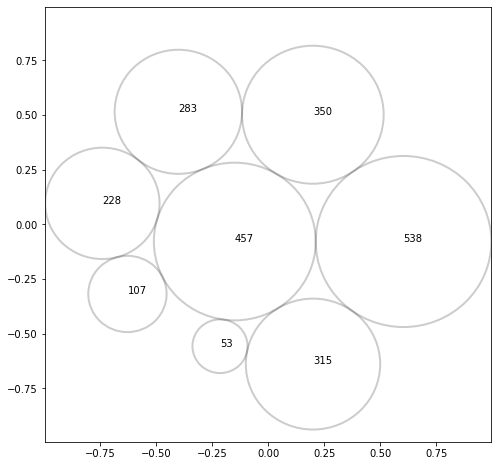

In [34]:
# faculty, teaching positions, admin, academia & research, medical & health, undergrads, grad students, other
# numbers from NEW2016SORTED.xlsx spreadsheet

circs16 = sorted([538,107,457,283,315,350,228,53])

circles16 = circ.circlify(circs16, show_enclosure=False)
pp(circles16)
circ.bubbles(circles16)